In [1]:
import torch

In [101]:
import torch
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms
from PIL import Image

class CarvanaDataset(Dataset):
    """Kaggle Carvana dataset."""
    
    def __init__(self, im_dir, mask_dir=None, transform=None):
        """
        Args:
        root_dir (string): Directory with all the images.
        mask_dir (string): Directory with the masks. None for test data. 
        debug_mode (bool): Use only first 100 images in the directory.
        """
    
        self.im_dir = im_dir # directory
        self.im_list = os.listdir(self.im_dir) # list with image names
        self.transform = transform
        
        if mask_dir:
            self.mask_dir = mask_dir
            self.mask_list = os.listdir(self.mask_dir)
            # list with id's to match them with training images
            self.maskid_list = [name.split('.')[0].split('_mask')[0] for name in self.mask_list]
            
    def __len__(self):
        return(len(self.im_list))
    
    def __getitem__(self, idx):
        im_name = os.path.join(self.im_dir, self.im_list[idx])
        im_id = self.im_list[idx].split('.')[0]
        
        image = Image.open(im_name)
        mask = None
        
        if self.transform:
            sample=self.transform(sample)
                
        if self.mask_dir:
            mask_loc = self.maskid_list.index(im_id)
            mask_name = os.path.join(self.mask_dir, self.mask_list[mask_loc])
            mask = Image.open(mask_name)
            
        sample={'image':image, 'mask':mask}
        return(sample)

In [102]:
traindataset = CarvanaDataset('../data/raw/train/', '../data/raw/train_masks/')

from tqdm import tqdm 

for i in tqdm(traindataset):
    continue




  0%|          | 0/5088 [00:00<?, ?it/s]


  0%|          | 1/5088 [00:00<09:02,  9.38it/s]


  0%|          | 3/5088 [00:00<08:16, 10.24it/s]


  0%|          | 5/5088 [00:00<07:32, 11.23it/s]


  0%|          | 7/5088 [00:00<07:07, 11.89it/s]


  0%|          | 9/5088 [00:00<06:53, 12.29it/s]


  0%|          | 11/5088 [00:00<06:33, 12.89it/s]


  0%|          | 13/5088 [00:00<06:22, 13.28it/s]


  0%|          | 15/5088 [00:01<06:37, 12.77it/s]


  0%|          | 17/5088 [00:01<06:23, 13.23it/s]


  0%|          | 19/5088 [00:01<06:15, 13.49it/s]


  0%|          | 21/5088 [00:01<06:09, 13.71it/s]


  0%|          | 23/5088 [00:01<06:06, 13.82it/s]


  0%|          | 25/5088 [00:01<06:15, 13.50it/s]


  1%|          | 27/5088 [00:02<06:13, 13.55it/s]


  1%|          | 29/5088 [00:02<06:11, 13.62it/s]


  1%|          | 31/5088 [00:02<06:07, 13.76it/s]


  1%|          | 33/5088 [00:02<06:49, 12.34it/s]


  1%|          | 35/5088 [00:02<07:50, 10.74it/s]


  1%|          | 37/508

KeyboardInterrupt: 

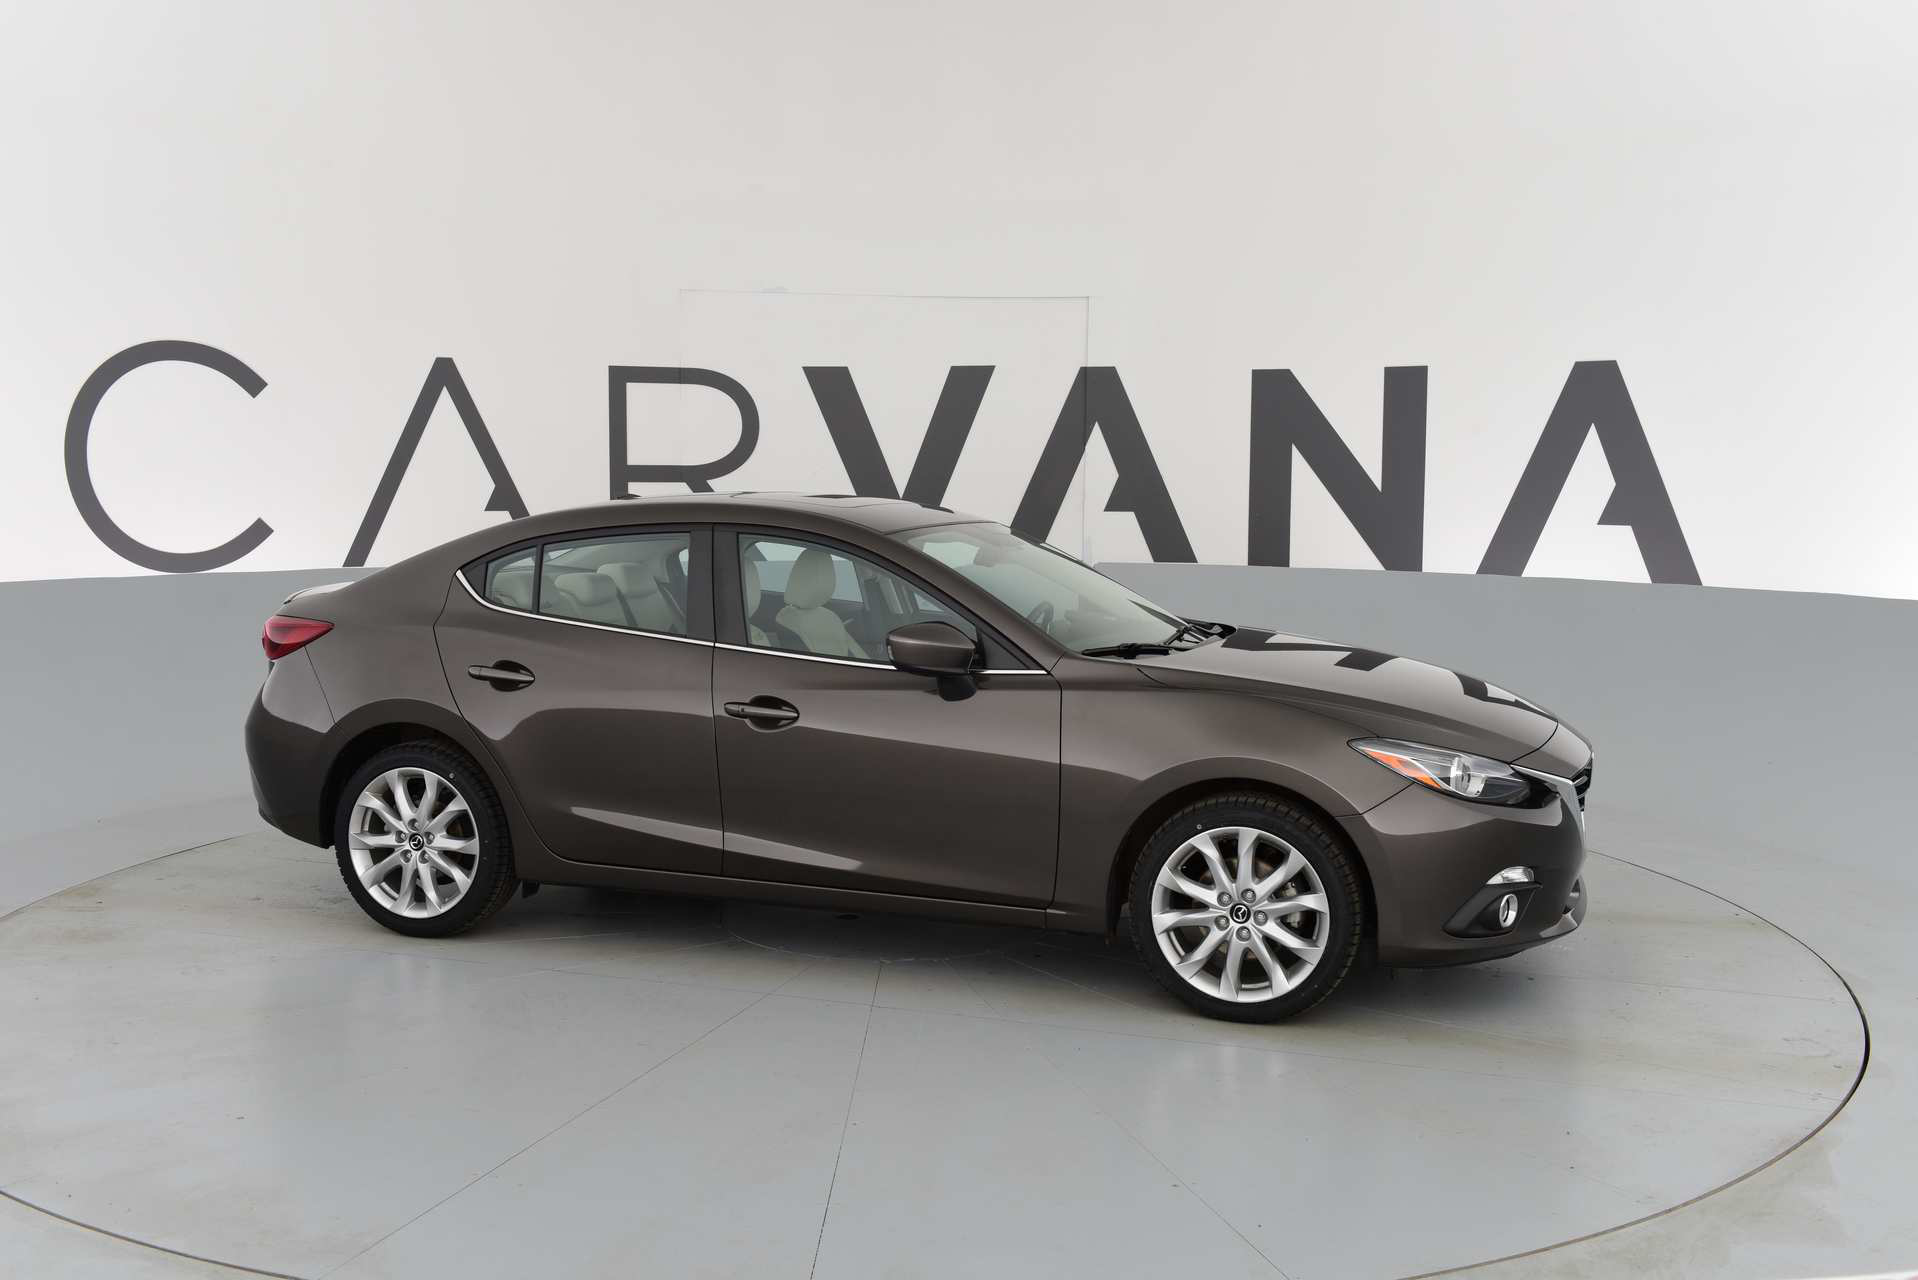

In [97]:
i['image']

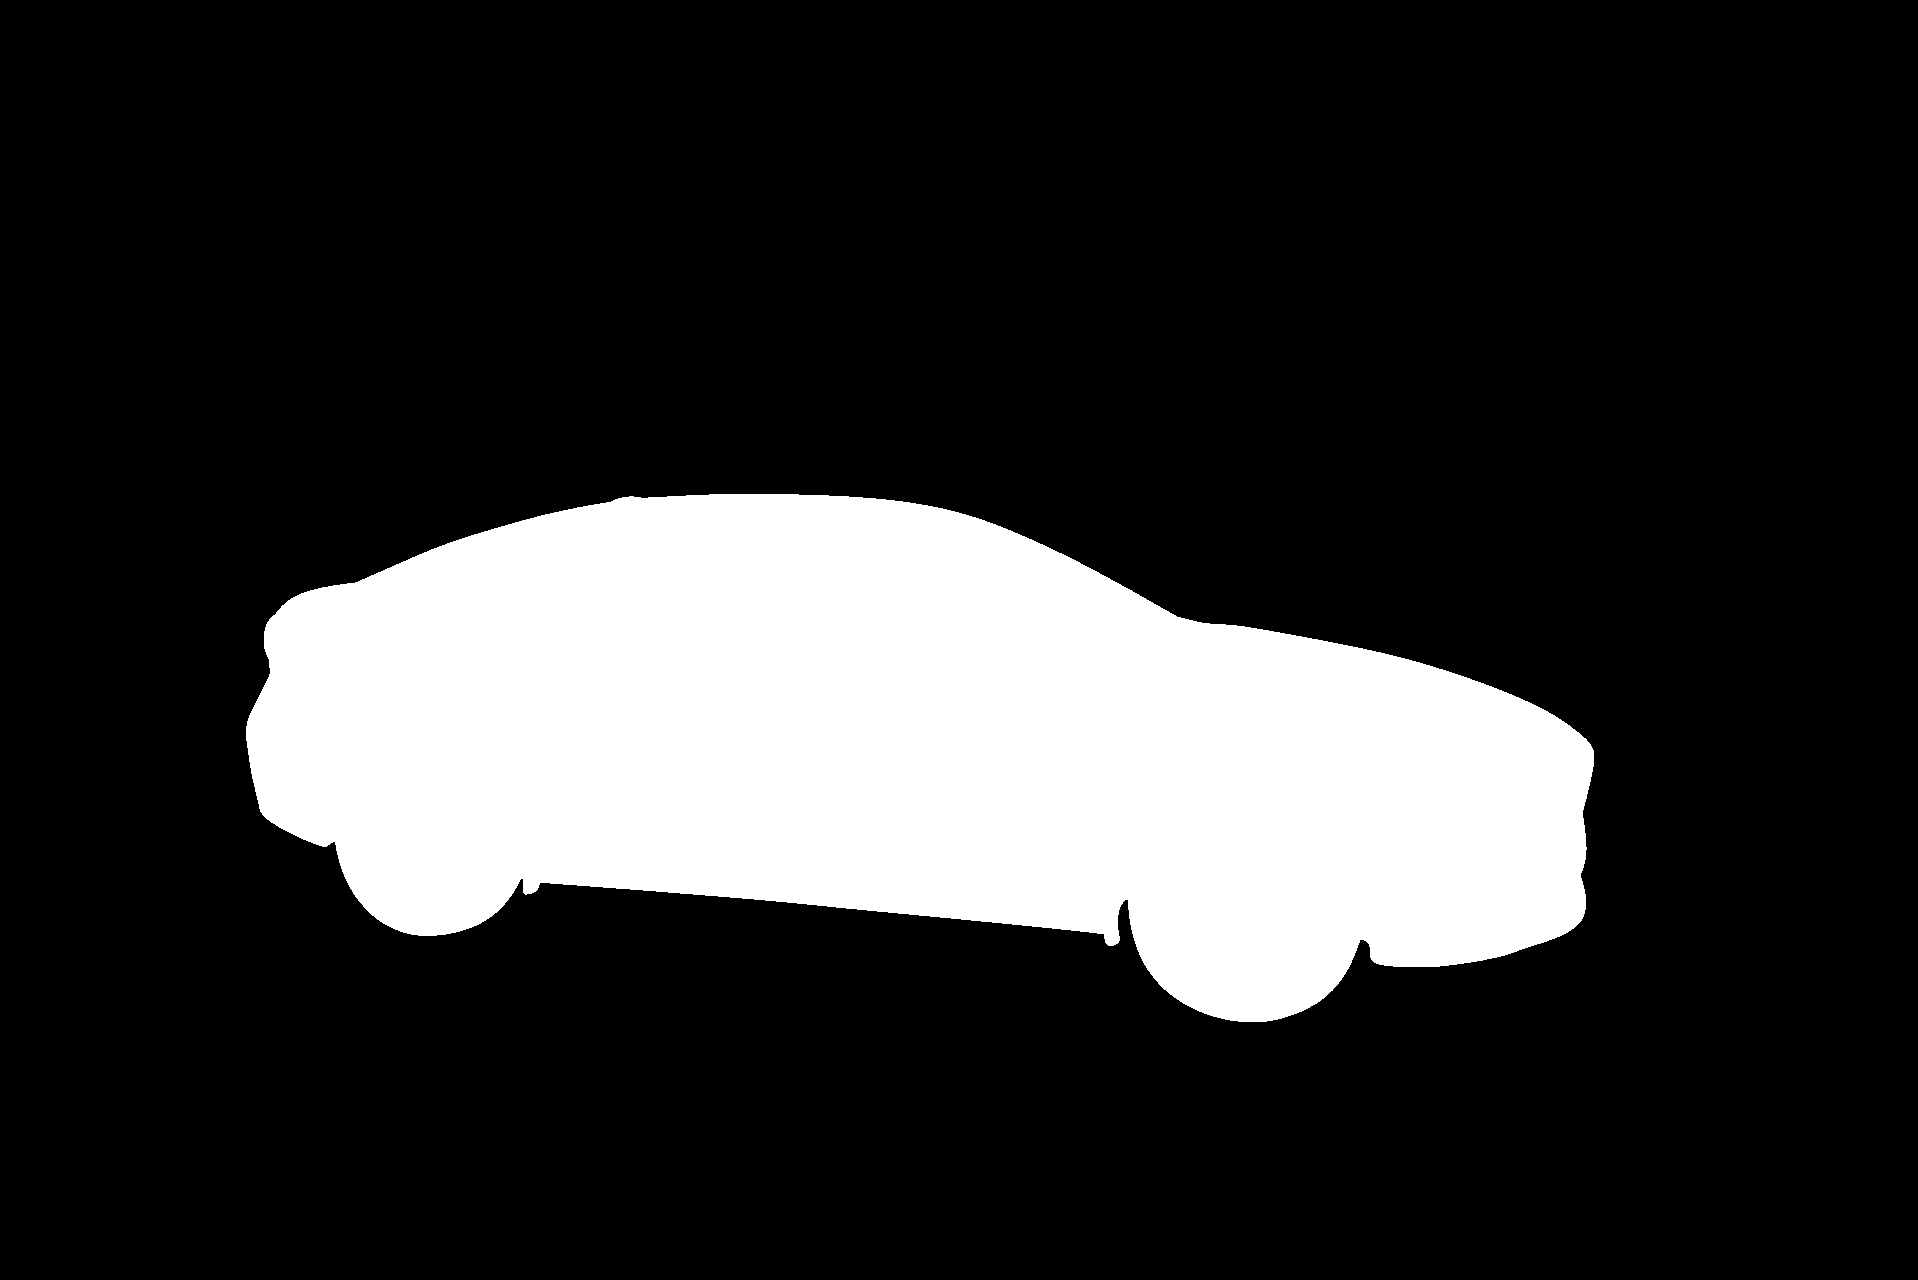

In [98]:
i['mask']

In [93]:
from tqdm import tqdm 

for i in tqdm(traindataset):
    continue



  0%|          | 0/5088 [00:00<?, ?it/s]

  6%|▌         | 303/5088 [00:00<00:01, 3027.33it/s]

 15%|█▍        | 749/5088 [00:00<00:01, 3349.81it/s]

 23%|██▎       | 1159/5088 [00:00<00:01, 3543.25it/s]

 32%|███▏      | 1603/5088 [00:00<00:00, 3763.60it/s]

 40%|████      | 2037/5088 [00:00<00:00, 3919.46it/s]

 48%|████▊     | 2462/5088 [00:00<00:00, 4013.06it/s]

 57%|█████▋    | 2889/5088 [00:00<00:00, 4084.63it/s]

 65%|██████▌   | 3324/5088 [00:00<00:00, 4160.65it/s]

 74%|███████▍  | 3767/5088 [00:00<00:00, 4229.57it/s]

 83%|████████▎ | 4216/5088 [00:01<00:00, 4294.16it/s]

 92%|█████████▏| 4658/5088 [00:01<00:00, 4330.88it/s]

100%|██████████| 5088/5088 [00:01<00:00, 4246.83it/s]

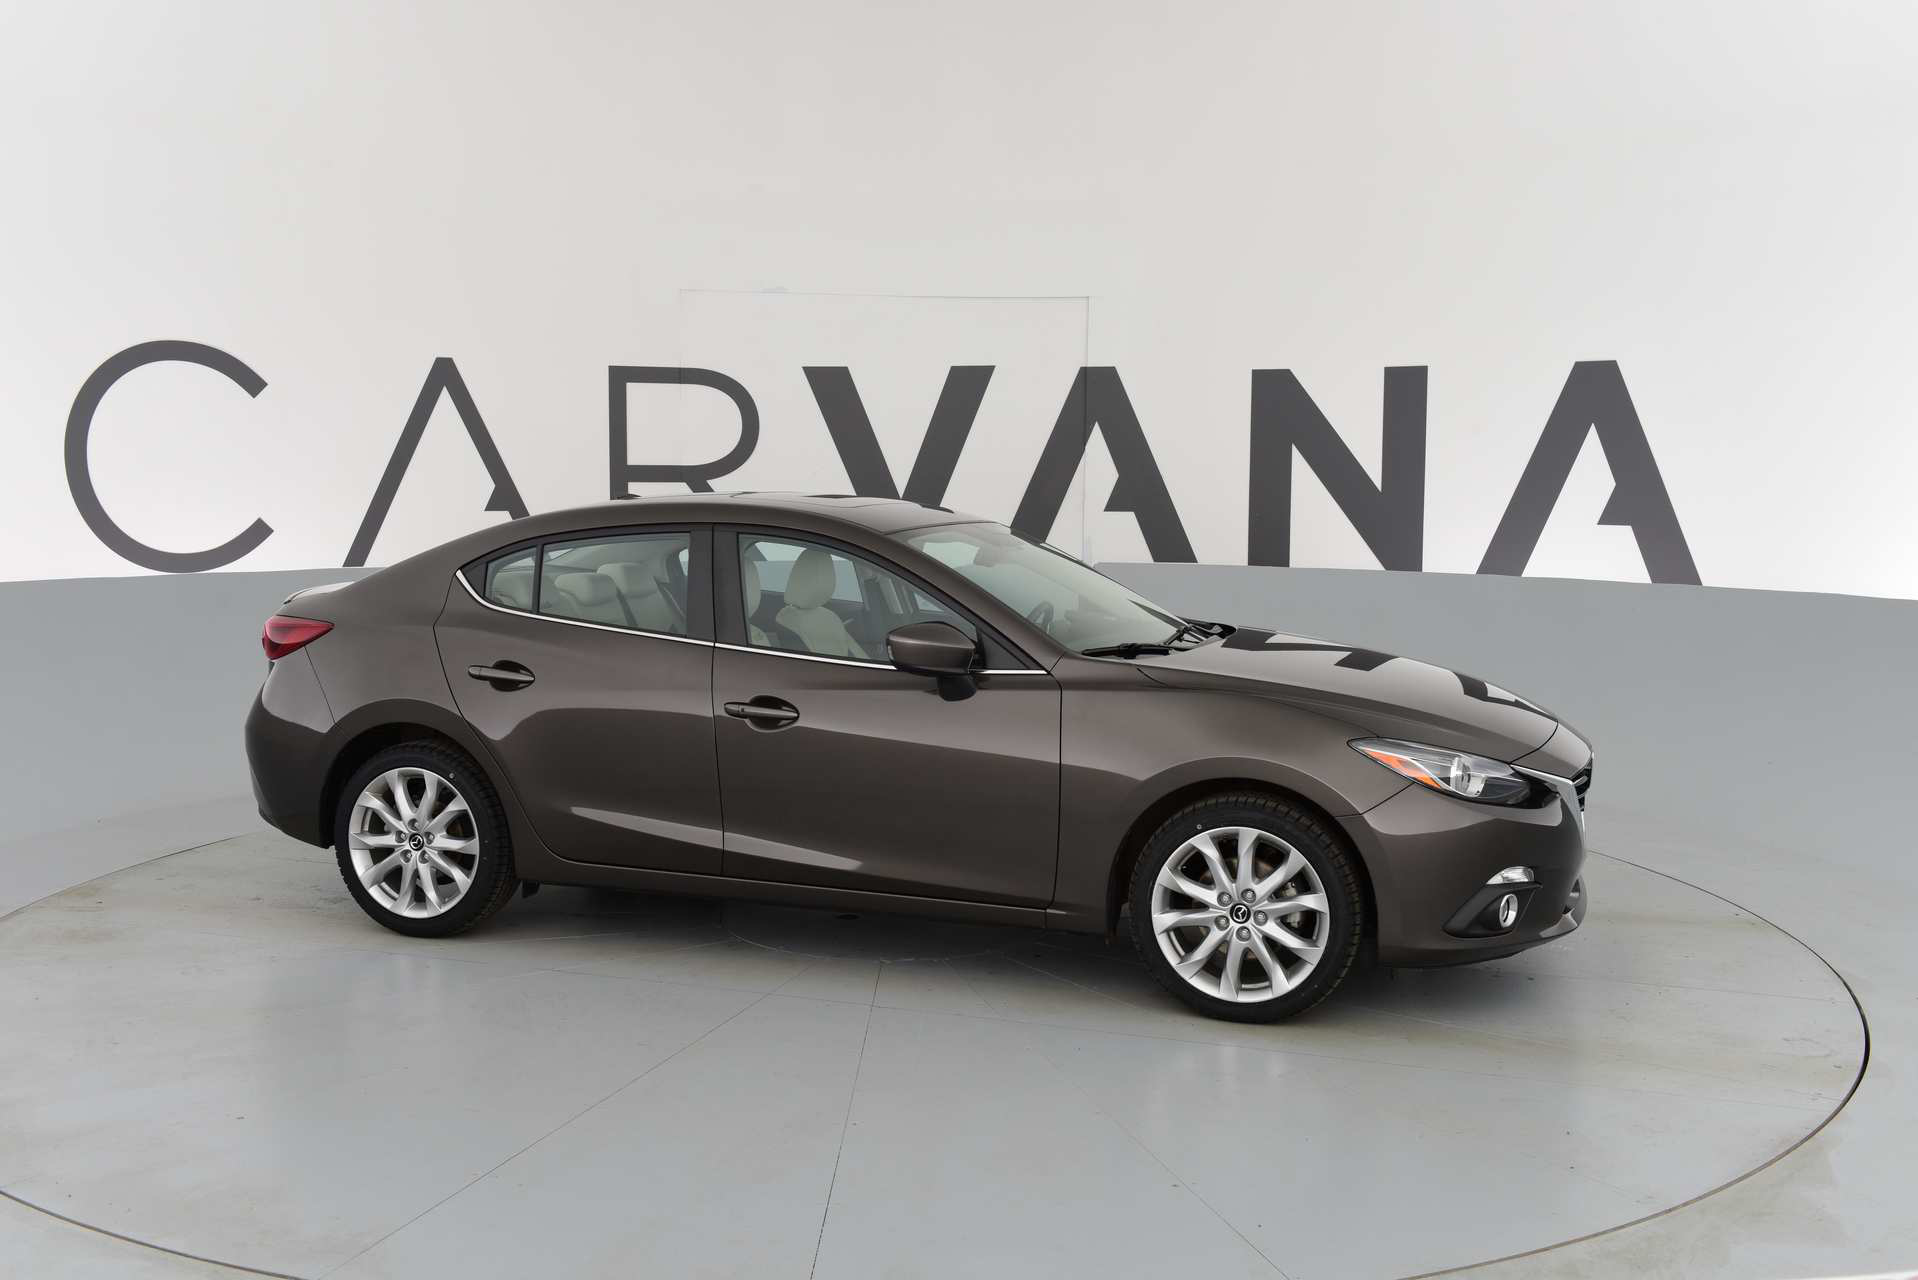

In [94]:
i['image']

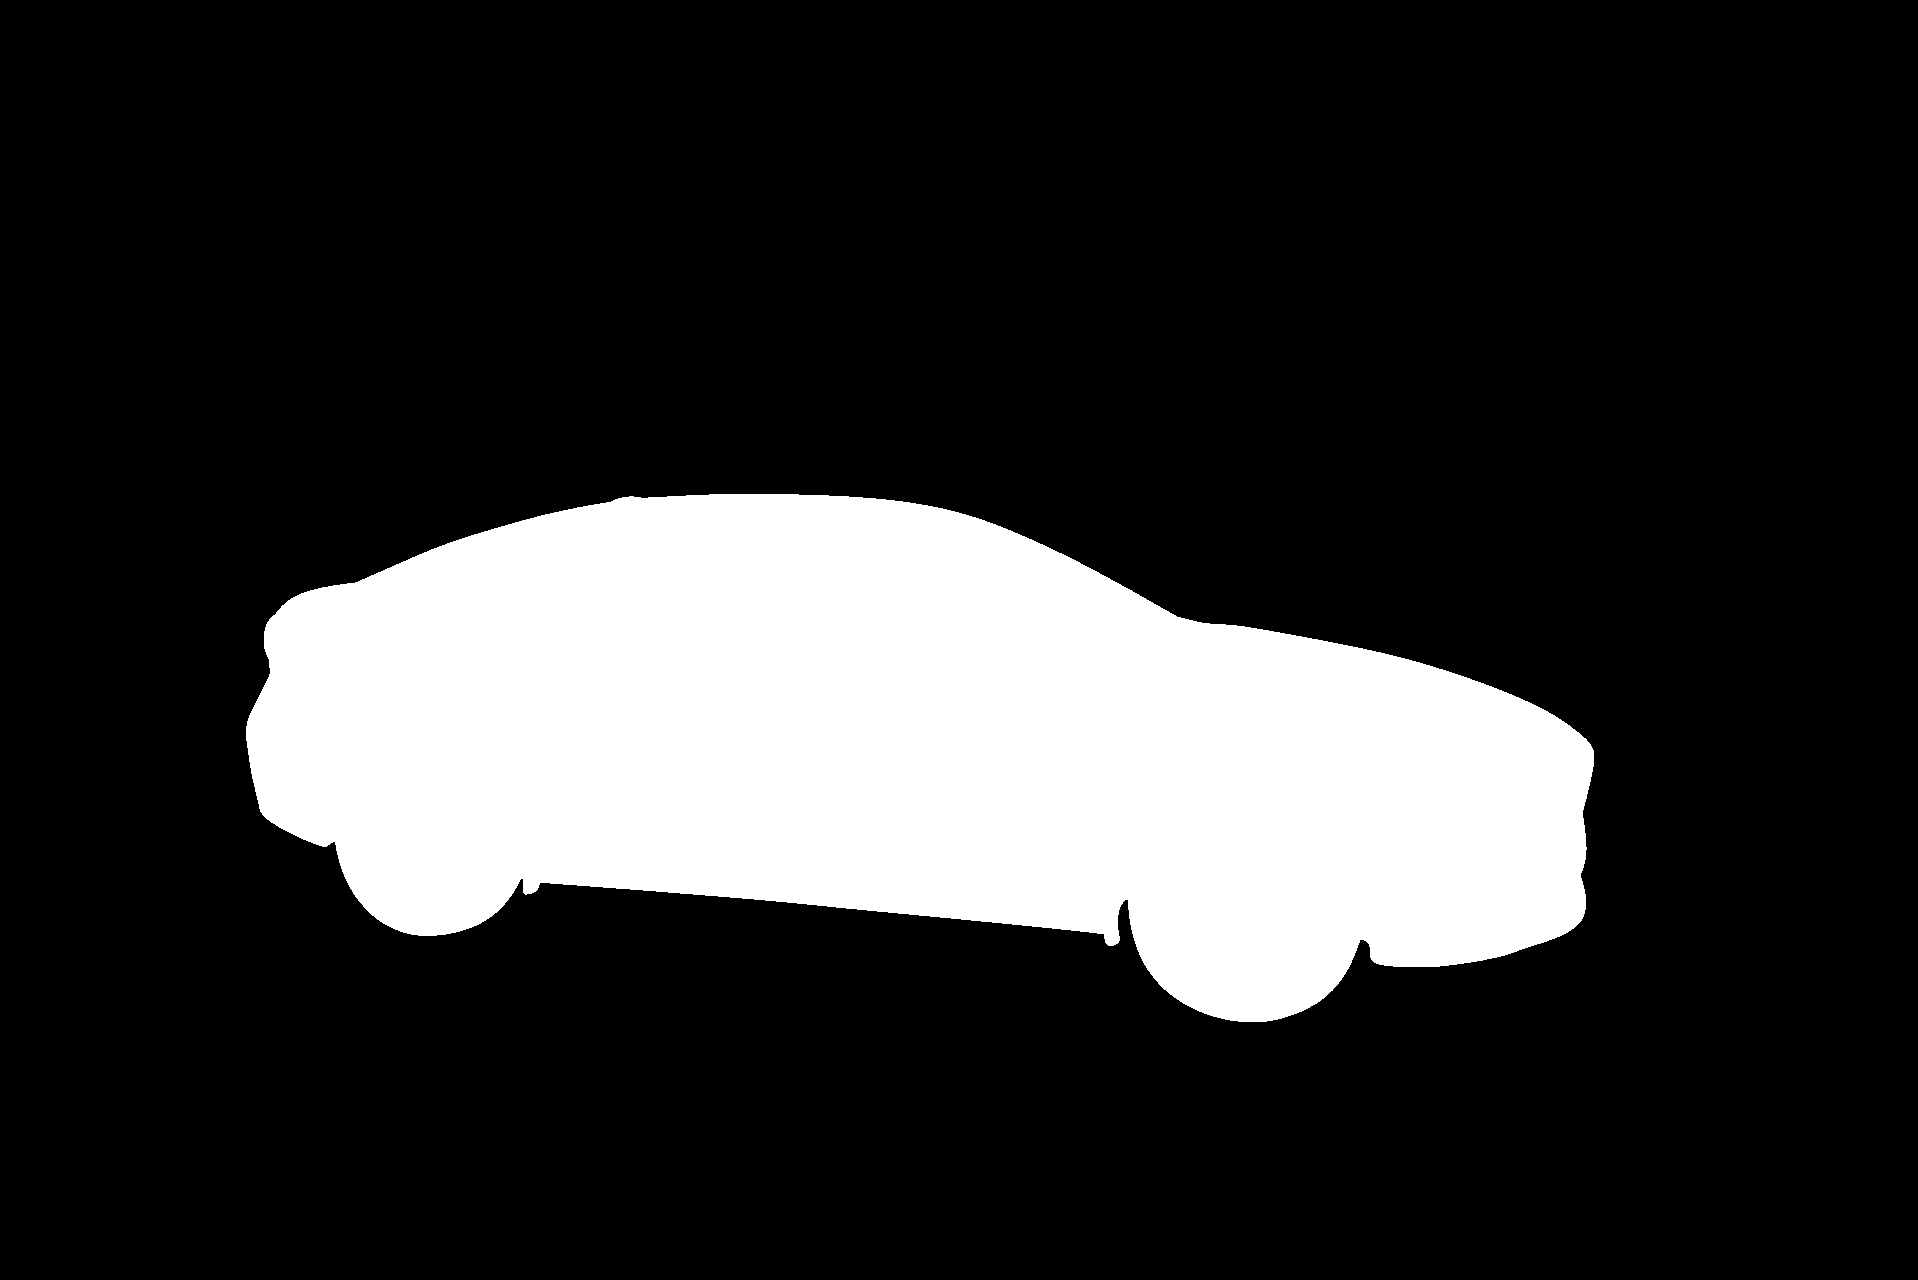

In [95]:
i['mask']

In [6]:
# HCK code

class CarvanaDataset(Dataset):

    def __init__(self, split, transform=[], is_label=True, is_preload=True):
        channel,height,width = 3, CARVANA_H, CARVANA_W

        # read names
        split_file = '' +'/split/'+ split
        with open(split_file) as f:
            names = f.readlines()
        names = [x.strip()for x in names]
        num   = len(names)

        #read images
        images = None
        if is_preload==True:
            images = np.zeros((num,height,width,channel),dtype=np.float32)
            for n in range(num):
                name = names[n]
                img_file = CARVANA_DIR + '/images/%s.jpg'%(name)
                img = cv2.imread(img_file)

                #img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
                #img = cv2.resize(img,(width,height))
                images[n] = img/255.

                #debug
                #print(n)

        #read labels
        labels = None
        if is_label==True:
            labels = np.zeros((num,height,width),dtype=np.float32)
            for n in range(num):
                name = names[n]
                shortname = name.split('/')[-1]
                # mask_file = CARVANA_DIR + '/annotations/%s_mask.gif'%(name)
                # mask = PIL.Image.open(mask_file)   #opencv does not read gif
                # mask = np.array(mask)

                mask_file = CARVANA_DIR + '/annotations/%s_mask.png'%(name)
                mask = cv2.imread(mask_file,cv2.IMREAD_GRAYSCALE)
                #mask = cv2.resize(mask,(width,height))
                labels[n] = mask/255

                #debug
                if 0:
                    im_show('mask1', mask*255, resize=1)
                    cv2.waitKey(0)


        #save
        self.split     = split
        self.transform = transform
        self.names  = names
        self.images = images
        self.labels = labels



    #https://discuss.pytorch.org/t/trying-to-iterate-through-my-custom-dataset/1909
    def __getitem__(self, index):

        if self.images is None:
            name = self.names[index]
            img_file = CARVANA_DIR + '/images/%s.jpg'%(name)
            img   = cv2.imread(img_file)
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

            image = img.astype(np.float32)/255
        else:
            image = self.images[index]


        if self.labels is None:
            for t in self.transform:
                image = t(image)
            image = image_to_tensor(image)
            return image, index

        else:
            label = self.labels[index]
            for t in self.transform:
                image,label = t(image,label)
            image = image_to_tensor(image)
            label = label_to_tensor(label)
            return image, label, index


    def __len__(self):
        #print ('\tcalling Dataset:__len__')
        return len(self.names)

SyntaxError: invalid syntax (<ipython-input-6-fcbbdeba0abd>, line 6)